In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'D:\Projects\plot_recommendition\preprocessed_data\gurgaon_properties_cleaned_v1.csv')

In [4]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,noOfFloor
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,store room,4.0,North,0 to 1 Year Old,"['Huda Metro Station (Gurugram)', 'Paras Trini...","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Water purifier', 'Security / Fire Alarm', 'P...",NaN


# 1] areaWithType

In [5]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2656,1.20,1930.0,Super Built up area 1930(179.3 sq.m.)
3481,2.75,2808.0,Plot area 312(260.87 sq.m.)Built Up area: 5000...
2599,1.70,2160.0,Plot area 240(200.67 sq.m.)
927,1.83,1829.0,Carpet area: 1829 (169.92 sq.m.)
793,0.33,55000.0,Carpet area: 54917 (5101.96 sq.m.)


In [6]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [10]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
137,0.40,house,500.0,Built Up area: 500 (46.45 sq.m.)Carpet area: 3...,NaN,500.0,300.0
1512,0.42,house,450.0,Built Up area: 450 (41.81 sq.m.),NaN,450.0,NaN
3737,12.25,house,5850.0,Plot area 5850(543.48 sq.m.),NaN,NaN,NaN
3218,5.00,flat,4800.0,Carpet area: 4800 (445.93 sq.m.),NaN,NaN,4800.0
725,5.90,flat,3375.0,Super Built up area 3363(312.43 sq.m.),3363.0,NaN,NaN


In [11]:
df.duplicated().sum()

np.int64(122)

In [12]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [13]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,0.34,house,270.0,Plot area 270(25.08 sq.m.),NaN,NaN,NaN
5,5.70,house,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550...,NaN,4550.0,4450.0
27,8.31,house,3438.0,Plot area 382(319.4 sq.m.),NaN,NaN,NaN
33,13.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
37,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN


In [14]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                862
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
noOfFloor              2960
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [22]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()))].iloc[:3, -3:]

,super_built_up_area,built_up_area,carpet_area
4,NaN,NaN,NaN
17,NaN,NaN,3844.0
18,NaN,NaN,1050.0


In [26]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'noOfFloor', 'super_built_up_area',
       'built_up_area', 'carpet_area'],
      dtype='object')

In [38]:
all_nan_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())].iloc[:5, [0, 3, 5, 6, 18, 19, 20]]

In [39]:
all_nan_df.sample(3)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
37,house,3.5,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
33,house,13.5,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
40,house,19.5,7200.0,Plot area 800(668.9 sq.m.),NaN,NaN,NaN


In [40]:
all_nan_index = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())].iloc[:5, [0, 3, 6, 18, 19, 20]].index

In [41]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [42]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [43]:
all_nan_df

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,house,0.34,270.0,Plot area 270(25.08 sq.m.),NaN,270.0,NaN
27,house,8.31,3438.0,Plot area 382(319.4 sq.m.),NaN,382.0,NaN
33,house,13.50,4518.0,Plot area 502(419.74 sq.m.),NaN,502.0,NaN
37,house,3.50,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
40,house,19.50,7200.0,Plot area 800(668.9 sq.m.),NaN,800.0,NaN


In [44]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [45]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [46]:
all_nan_df.sample(3)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,house,0.34,270.0,Plot area 270(25.08 sq.m.),NaN,270.0,NaN
27,house,8.31,3438.0,Plot area 382(319.4 sq.m.),NaN,3438.0,NaN
40,house,19.50,7200.0,Plot area 800(668.9 sq.m.),NaN,7200.0,NaN


In [47]:
# update the original dataframe
df.update(all_nan_df)

In [48]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                862
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
noOfFloor              2960
super_built_up_area    1888
built_up_area          2611
carpet_area            1859
dtype: int64

In [49]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,noOfFloor,super_built_up_area,built_up_area,carpet_area
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,...,4.0,North,0 to 1 Year Old,"['Huda Metro Station (Gurugram)', 'Paras Trini...","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Water purifier', 'Security / Fire Alarm', 'P...",NaN,1727.0,NaN,1017.0
1,flat,tulip violet,sector 69,1.43,8886.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,...,1.0,North-West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral ...","['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,1608.0,NaN,NaN
2,flat,godrej frontier,sector 80,1.60,7000.0,2286.0,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,...,5.0,NaN,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",[],"['Intercom Facility', 'Lift(s)', 'Maintenance ...",NaN,2262.0,NaN,NaN
3,flat,indiabulls centrum park,sector 103,2.45,8521.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,...,11.0,East,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 1...","['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Lift(s)', 'Swimming Pool', 'Park', 'Shopping...",NaN,2875.0,NaN,NaN
4,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,...,NaN,West,5 to 10 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...","['1 Wardrobe', '3 Fan', '6 Light', 'No AC', 'N...","['Water Storage', 'Park', 'Visitor Parking']",3.0,NaN,270.0,NaN


# 2] additionalRoom

In [50]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
store room,study room,servant room                  1
store room,servant room,study room,pooja room       1
store room,pooja room,servant room,study room       1
servant room,store room,study room,pooja room       1
study room,others,servant room                      1
Name: count, Length: 65, dtype: int64

In [51]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [52]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2509,not available,0,0,0,0,0
2395,study room,1,0,0,0,0
2095,servant room,0,1,0,0,0
2206,store room,0,0,1,0,0
1536,store room,0,0,1,0,0


In [53]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,features,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,...,"['Water purifier', 'Security / Fire Alarm', 'P...",NaN,1727.0,NaN,1017.0,0,0,1,0,0
1,flat,tulip violet,sector 69,1.43,8886.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,...,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,1608.0,NaN,NaN,0,0,0,1,0
2,flat,godrej frontier,sector 80,1.60,7000.0,2286.0,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,...,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",NaN,2262.0,NaN,NaN,0,1,0,0,0
3,flat,indiabulls centrum park,sector 103,2.45,8521.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,...,"['Lift(s)', 'Swimming Pool', 'Park', 'Shopping...",NaN,2875.0,NaN,NaN,1,1,1,1,0
4,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,...,"['Water Storage', 'Park', 'Visitor Parking']",3.0,NaN,270.0,NaN,0,0,0,0,0


# 3] agePossesion

In [54]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Oct 2023                 4
Aug 2024                 4
Jul 2024                 4
By 2025                  4
Sep 2023                 4
May 2024                 3
Feb 2024                 3
Nov 2024                 3
Jan 2025                 3
Mar 2025                 2
Oct 2025                 2
Aug 2025                 2
By 2027                  2
Jul 2025                 2
Apr 2026                 2
Sep 2025                 2
Jun 2027                 2
Jan 2026      

In [55]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [56]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [58]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,features,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,...,"['Water purifier', 'Security / Fire Alarm', 'P...",NaN,1727.0,NaN,1017.0,0,0,1,0,0
1,flat,tulip violet,sector 69,1.43,8886.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,...,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,1608.0,NaN,NaN,0,0,0,1,0
2,flat,godrej frontier,sector 80,1.60,7000.0,2286.0,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,...,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",NaN,2262.0,NaN,NaN,0,1,0,0,0
3,flat,indiabulls centrum park,sector 103,2.45,8521.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,...,"['Lift(s)', 'Swimming Pool', 'Park', 'Shopping...",NaN,2875.0,NaN,NaN,1,1,1,1,0
4,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,...,"['Water Storage', 'Park', 'Visitor Parking']",3.0,NaN,270.0,NaN,0,0,0,0,0


# 4] furnishDetails

In [59]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1442,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
3513,NaN,"['Centrally Air Conditioned', 'Water purifier'..."
1381,"['1 Water Purifier', '4 Geyser', '1 Chimney', ...","['Feng Shui / Vaastu Compliant', 'Security / F..."
3443,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
2475,"['7 Light', '6 AC', '1 Modular Kitchen', 'No B...","['Feng Shui / Vaastu Compliant', 'Security / F..."


In [60]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6876\2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [61]:
furnishings_df.shape

(3803, 19)

In [62]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6876\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [63]:
furnishings_df.sample(5)

,Dining Table,Exhaust Fan,Washing Machine,Bed,TV,Curtains,Fan,Fridge,Sofa,Wardrobe,Chimney,Modular Kitchen,Stove,Light,AC,Geyser,Microwave,Water Purifier
3354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3499,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,5,0,0
3083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1529,0,1,0,0,0,1,6,0,0,3,1,1,1,10,5,4,0,0
2987,0,0,0,0,0,0,6,0,0,4,0,0,0,12,0,2,0,0


In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [66]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

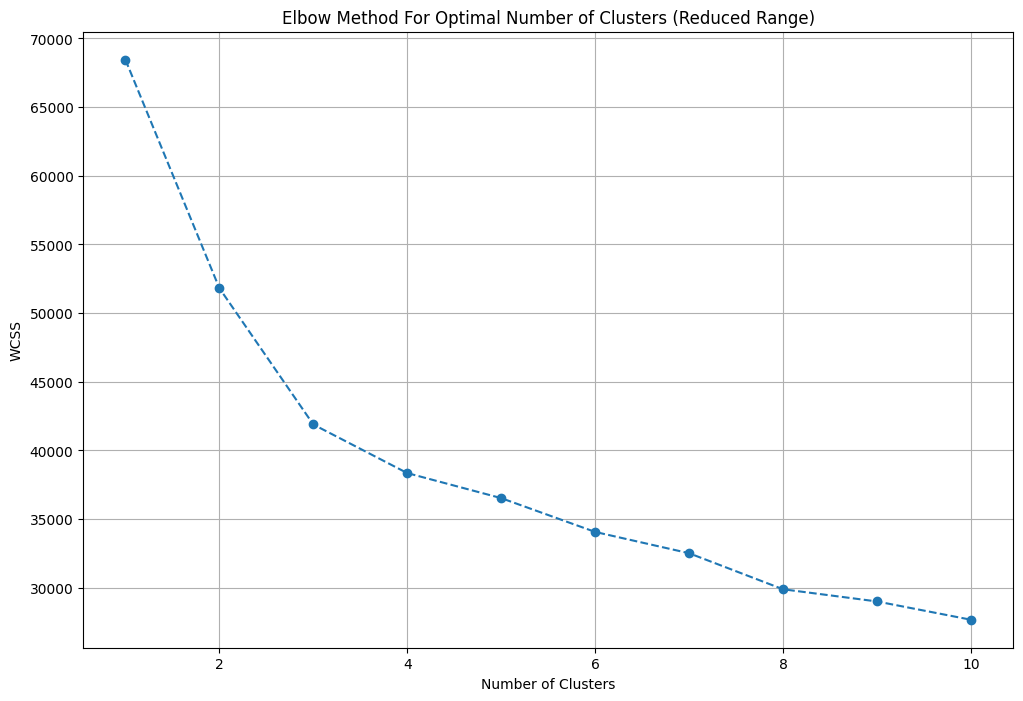

In [67]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [68]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [69]:
df = df.iloc[:,:-18]

In [70]:
df['furnishing_type'] = cluster_assignments

In [71]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
374,NaN,0
1295,"['1 Bed', '1 Wardrobe', '1 Fan', '1 Sofa', '1 ...",0
1336,"['1 Wardrobe', '3 Fan', '3 Light', 'No AC', 'N...",0
3530,"['4 Fan', '1 Exhaust Fan', '3 Geyser', '8 Ligh...",1
2481,"['4 Fan', '1 Exhaust Fan', '2 Geyser', '4 Ligh...",1


# 5] Features

In [72]:
df[['society','features']].sample(5)

,society,features
3159,dlf exclusive floors,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
747,pyramid urban homes 2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
1546,independent,"['Feng Shui / Vaastu Compliant', 'Park', 'Visi..."
2519,tulip violet,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
1428,independent,NaN


In [73]:
df['features'].isnull().sum()

np.int64(635)

In [74]:
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [75]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [76]:
temp_df = df[df['features'].isnull()]

In [77]:
temp_df.shape

(635, 27)

In [78]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [79]:
df.loc[temp_df.index,'features'] = x.values

In [80]:
df['features'].isnull().sum()

np.int64(481)

In [81]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [82]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [83]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1098,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0
2235,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
features_binary_df.shape

(3803, 130)

In [85]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

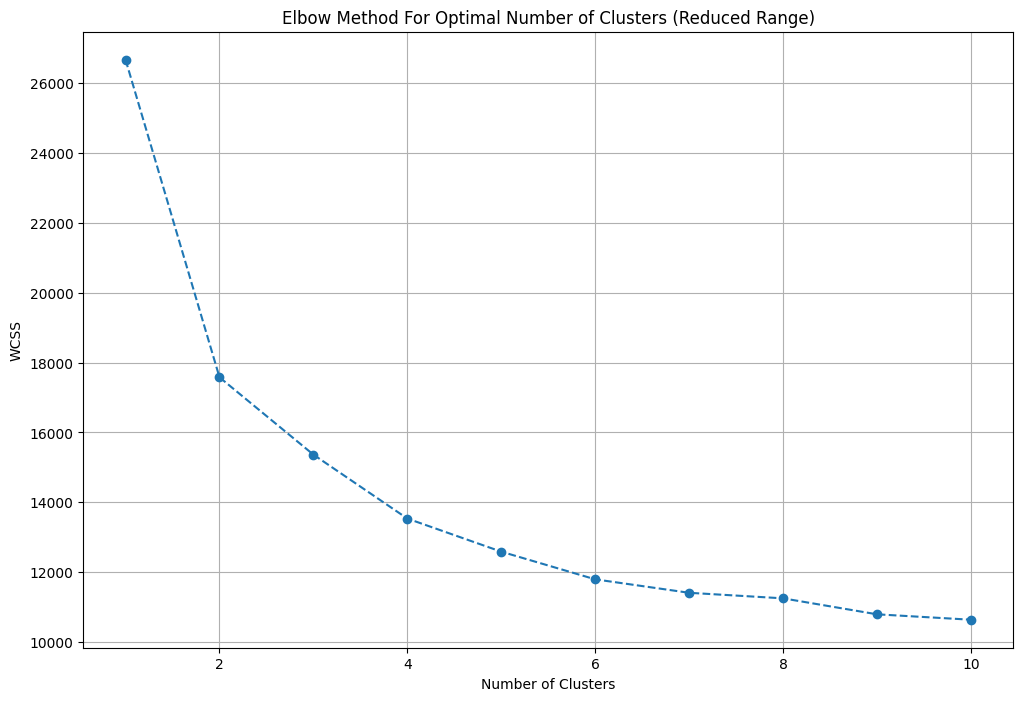

In [86]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [87]:
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
     'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
     'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
     'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
     'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [88]:
df['luxury_score'] = luxury_score

In [89]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,...,NaN,1017.0,0,0,1,0,0,1,"[Water purifier, Security / Fire Alarm, Power ...",142
1,flat,tulip violet,sector 69,1.43,8886.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,...,NaN,NaN,0,0,0,1,0,0,"[Power Back-up, Feng Shui / Vaastu Compliant, ...",86
2,flat,godrej frontier,sector 80,1.60,7000.0,2286.0,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,...,NaN,NaN,0,1,0,0,0,0,"[Intercom Facility, Lift(s), Maintenance Staff...",53
3,flat,indiabulls centrum park,sector 103,2.45,8521.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,...,NaN,NaN,1,1,1,1,0,0,"[Lift(s), Swimming Pool, Park, Shopping Centre...",38
4,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,...,270.0,NaN,0,0,0,0,0,0,"[Water Storage, Park, Visitor Parking]",22


In [90]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [91]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3012,flat,emaar mgf emerald floors premier,sector 65,2.79,14126.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4.0,4.0,3+,...,NaN,NaN,1975.0,1,1,0,0,0,2,174
2061,flat,umang monsoon breeze,sector 78,1.05,5666.0,1853.0,Built Up area: 1853 (172.15 sq.m.)Carpet area:...,3.0,3.0,3,...,NaN,1853.0,1390.0,0,0,0,0,0,0,0
339,flat,m3m skycity,sector 65,2.00,15267.0,1310.0,Super Built up area 1310(121.7 sq.m.),2.0,2.0,2,...,1310.0,NaN,NaN,0,0,0,0,0,1,174
249,house,independent,sector 54,3.51,12342.0,2844.0,Plot area 316(264.22 sq.m.),4.0,4.0,3,...,NaN,NaN,NaN,0,1,0,0,0,0,73
3150,flat,conscient heritage max,sector 102,1.75,9011.0,1942.0,Super Built up area 1942(180.42 sq.m.),3.0,4.0,3+,...,1942.0,NaN,NaN,0,1,0,0,0,1,94


In [92]:
df.shape

(3803, 24)

In [93]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)